Создаем датасет №1, предварительно импортировав все библиотеки

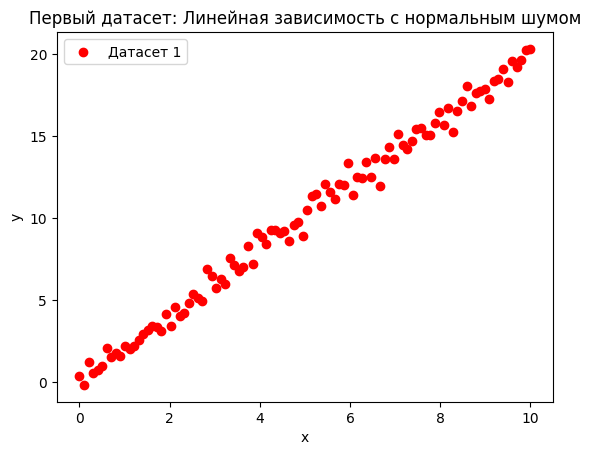

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Генерация значений x
x = np.linspace(0, 10, 100)
# Генерация значений y с меньшим уровнем шума
y = 2 * x + np.random.normal(0, 0.5, 100)

# сохранение датасета в каталог
directory_name = 'datasets'
# Создание каталога, если он не существует
if not os.path.exists(directory_name):
    os.makedirs(directory_name)

file_path = os.path.join(directory_name, 'dataset_1.csv')


# Визуализация первого датасета
plt.scatter(x, y, color='red', label='Датасет 1')
plt.title('Первый датасет: Линейная зависимость с нормальным шумом')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

df = pd.DataFrame({'x': x, 'y': y})
df.to_csv(file_path, index=False)

создаем второй датасет


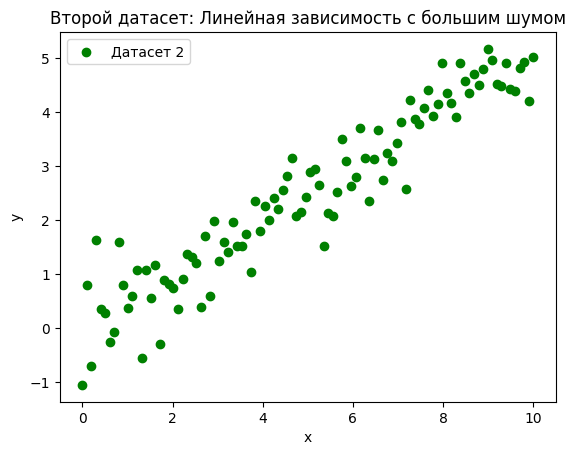

In [68]:
# Генерация значений x
x = np.linspace(0, 10, 100)
# Генерация значений y с большим уровнем шума
y = 0.5 * x + np.random.normal(0, 0.5, 100)

# сохранение датасета в каталог
directory_name = 'datasets'
# Создание каталога, если он не существует
if not os.path.exists(directory_name):
    os.makedirs(directory_name)

file_path = os.path.join(directory_name, 'dataset_2.csv')

# Визуализация второго датасета
plt.scatter(x, y, color='green', label='Датасет 2')
plt.title('Второй датасет: Линейная зависимость с большим шумом')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

df = pd.DataFrame({'x': x, 'y': y})
df.to_csv(file_path, index=False)

создаем третьий датасет

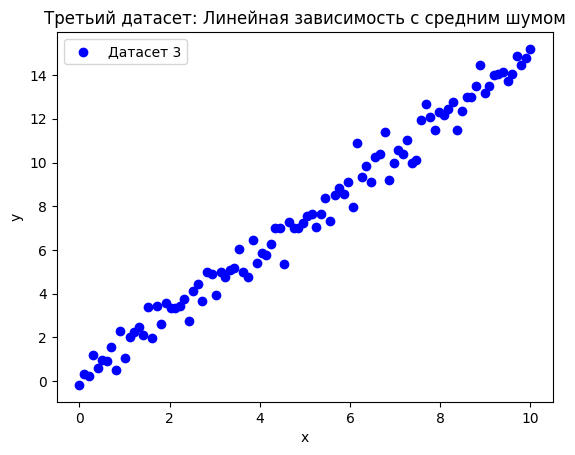

In [70]:
# Генерация значений x
x = np.linspace(0, 10, 100)
# Генерация значений y со средним уровнем шума
y = 1.5 * x + np.random.normal(0, 0.5, 100)

# сохранение датасета в каталог
directory_name = 'datasets'
# Создание каталога, если он не существует
if not os.path.exists(directory_name):
    os.makedirs(directory_name)

file_path = os.path.join(directory_name, 'dataset_3.csv')


# Визуализация второго датасета
plt.scatter(x, y, color='blue', label='Датасет 3')
plt.title('Третьий датасет: Линейная зависимость с средним шумом')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

df = pd.DataFrame({'x': x, 'y': y})
df.to_csv(file_path, index=False)

создаем датасет с выбросом

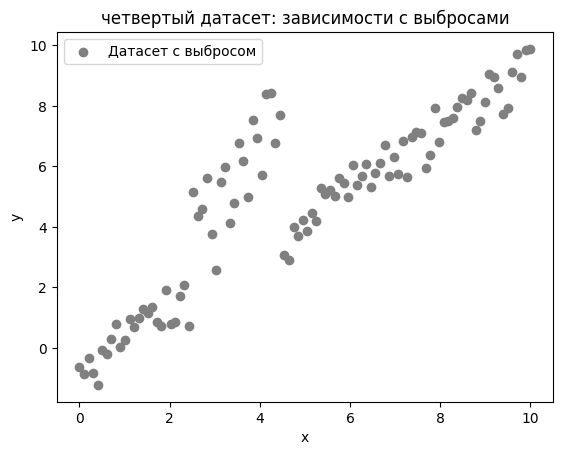

In [71]:
# генерация значений с выбросами
x = np.linspace(0, 10, 100)
y = x + np.random.random(100)*1.85-1.75

y[25:45] *= 2

plt.scatter(x, y, color='gray', label='Датасет с выбросом')
plt.title('четвертый датасет: зависимости с выбросами')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# сохранение датасета в каталог
directory_name = 'datasets'
# Создание каталога, если он не существует
if not os.path.exists(directory_name):
    os.makedirs(directory_name)

file_path = os.path.join(directory_name, 'dataset_noizy.csv')


df = pd.DataFrame({'x': x, 'y': y})
df.to_csv(file_path, index=False)

Создаем и обучаем модель на первом датасете


In [72]:
import os
import subprocess

# путь к директории
directory = "model"
# Создаем директорию, если она не существует
if not os.path.exists(directory):
    os.makedirs(directory)

# Задаем имя файла
filename = os.path.join(directory, "model.py")

# Записываем код в файл
with open(filename, 'w') as file:
    file.write("""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

import os
import joblib

# Загрузака данных
file_path = 'datasets/dataset_1.csv'
data = pd.read_csv(file_path)

# Подготовка данных
X = data.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = data.iloc[:, -1].values   # Последний столбец

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование и оценка модели
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Средняя квадратичная ошибка: {mse:.2f}')
print(f'Коэффициент детерминации: {r2:.2f}')

# Визуализация результатов
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Предсказанные данные')
plt.title('Модель линейной регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()""")

# Запускаем файл model.py
try:
    # Строка для выполнения файла
    result = subprocess.run(['python', filename], capture_output=True, text=True)
    # Выводим результат выполнения
    print("Результат выполнения:\n", result.stdout)
    print("Ошибки:\n", result.stderr)
except Exception as e:
    print(f"Произошла ошибка: {e}")

Результат выполнения:
 Средняя квадратичная ошибка: 0.29
Коэффициент детерминации: 0.99
Figure(640x480)

Ошибки:
 


Сам файл model.py

Средняя квадратичная ошибка: 0.23
Коэффициент детерминации: 0.99


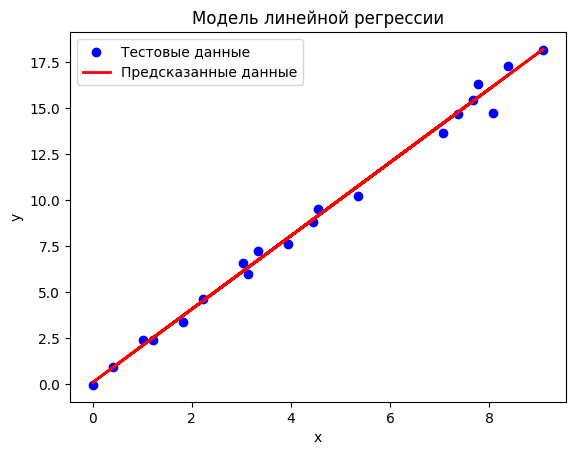

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Загрузака данных
file_path = 'datasets/dataset_1.csv'
data = pd.read_csv(file_path)

# Подготовка данных
X = data.iloc[:, :-1].values  # Все столбцы, кроме последнего
y = data.iloc[:, -1].values   # Последний столбец

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование и оценка модели
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Средняя квадратичная ошибка: {mse:.2f}')
print(f'Коэффициент детерминации: {r2:.2f}')

# Визуализация результатов
plt.scatter(X_test, y_test, color='blue', label='Тестовые данные')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Предсказанные данные')
plt.title('Модель линейной регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

устанавливаем Pytest

In [66]:
!pip install pytest

тестируем модель на полученных датасетах

In [73]:
import pytest
from model import train_test_split

# Перечень файлов с датасетами для тестирования
datasets = [
    "datasets/dataset_1.csv",
    "datasets/dataset_2.csv",
    "datasets/dataset_3.csv",
    "datasets/dataset_noizy.csv"
]

@pytest.mark.parametrize("dataset", datasets)
def test_model_performance(dataset):
    mse, r2 = train_test_split(dataset)


    assert mse < 0.5, f"MSE слишком высок: {mse} для датасета: {dataset}"
    assert r2 > 0.8, f"R² слишком низкий: {r2} для датасета: {dataset}"


ImportError: cannot import name 'train_test_split' from 'model' (unknown location)